In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [179]:
df = pd.read_csv('..\\Datasets\\Social_Network_Ads.csv')
# df.head()
df = df.iloc[:,2:]
df.sample(5)

,Age,EstimatedSalary,Purchased
229,42,80000,1
188,35,72000,0
193,19,70000,0
266,40,75000,0
36,33,28000,0


## Train Test Split

In [180]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.3,random_state=0)
X_train.shape,X_test.shape

((280, 2), (120, 2))

## Standard Scaler

In [181]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# fit the scaler to the train set, it will learn the parameters mean and standard deviation
scaler.fit(X_train)
# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [182]:
print(type(X_train_scaled))
# print(X_train_scaled)
print(X_train.columns)
scaler.mean_

<class 'numpy.ndarray'>
Index(['Age', 'EstimatedSalary'], dtype='object')


array([3.78642857e+01, 6.98071429e+04])

In [183]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [184]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [185]:
np.round(X_train_scaled.describe(),1)


,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


# Effect of Scaling

Text(0.5, 1.0, 'After scaling')

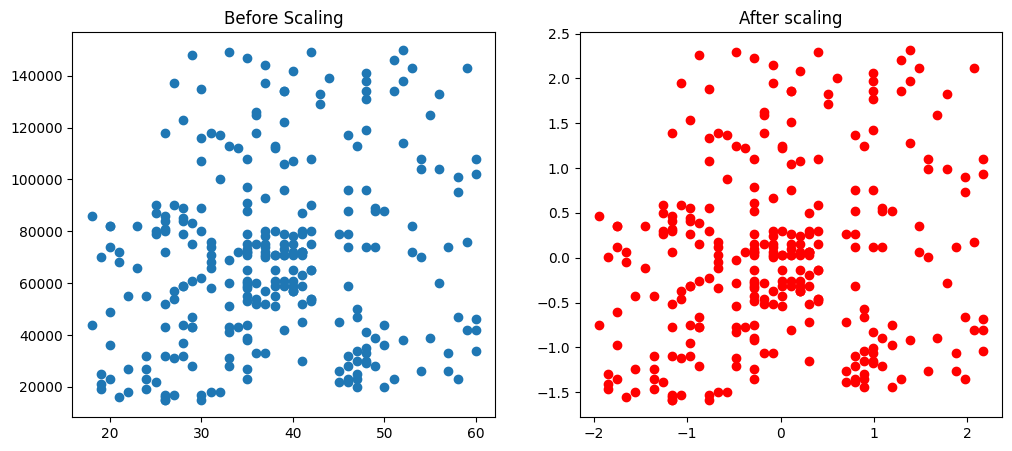

In [186]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')

ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title('After scaling')

Text(0.5, 1.0, 'After Scaling')

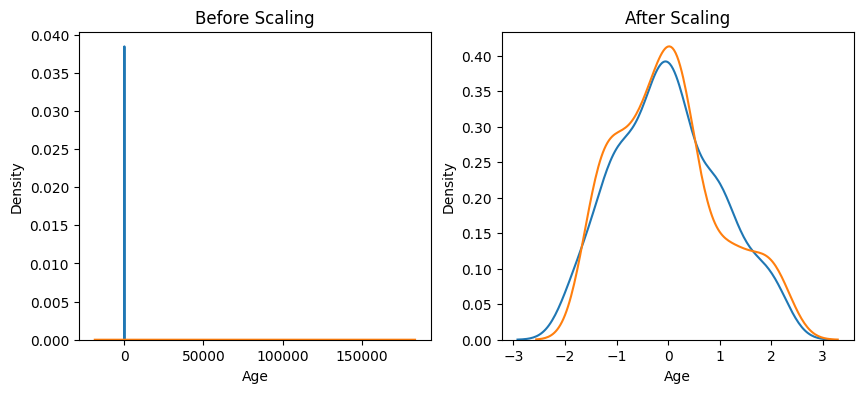

In [187]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(10,4))
sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)
ax1.set_title('Before Scaling')

sns.kdeplot(X_train_scaled['Age'],ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
ax2.set_title('After Scaling')

In above before scaling graph, <br>
- pdf of age is straight vertical line because the range of x-axis is very huge ; so it appears straight line
- pdf of estimatedsalary is horizontal like because of large variation of the values
- these two right now can not be compared

# Comparison of Distributions before and after Scaling

Text(0.5, 1.0, 'After scaling')

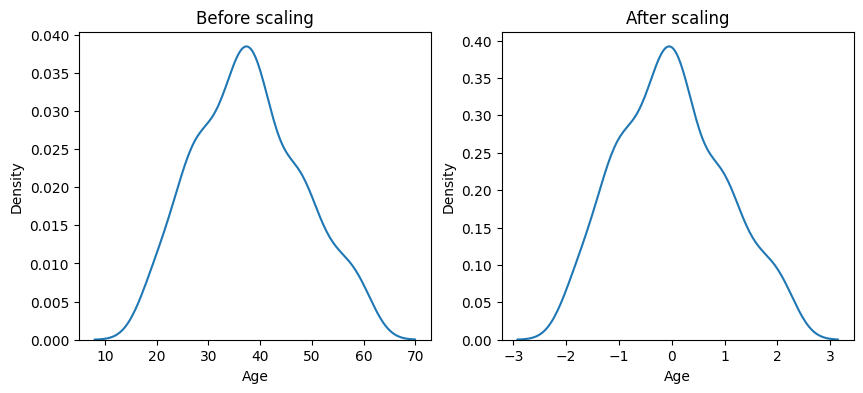

In [188]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(10,4))

sns.kdeplot(X_train['Age'],ax=ax1)
ax1.set_title('Before scaling')

sns.kdeplot(X_train_scaled['Age'],ax=ax2)
ax2.set_title('After scaling')

shape of distribution remains unchanged after scaling

Text(0.5, 1.0, 'After scaling')

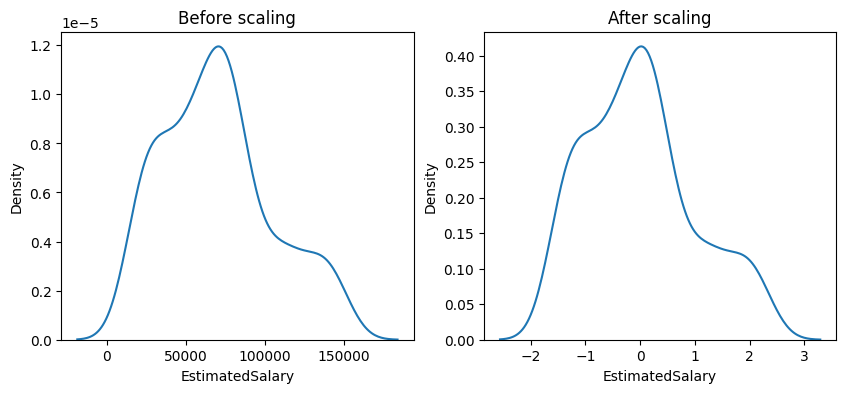

In [189]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(10,4))

sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)
ax1.set_title('Before scaling')

sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
ax2.set_title('After scaling')

# Implementation in LOGISTIC REGRESSION

In [190]:
from sklearn.linear_model import LogisticRegression

In [191]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [192]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [193]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [194]:
from sklearn.metrics import accuracy_score

In [195]:
print(f"Accuracy in Orginal Data:{accuracy_score(y_test,y_pred) *100}")
print(f"Accuracy in Scaled Data:{accuracy_score(y_test,y_pred_scaled) *100}")

# print("Actual",accuracy_score(y_test,y_pred))
# print("Scaled",accuracy_score(y_test,y_pred_scaled))

Accuracy in Orginal Data:87.5
Accuracy in Scaled Data:86.66666666666667


In logistic regression, the accuracy score comes more when scaled data is used.

# Implementation in DECISION TREE

In [196]:
from sklearn.tree import DecisionTreeClassifier

In [197]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [198]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [199]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [200]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667


Scaling has no effect in decision tree classifier

# Effect of Outlier

In [201]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


Adding some outliers to the dataset

In [202]:
new_data = pd.DataFrame({'Age':[5,90,95], 'EstimatedSalary':[1000,250000,350000], 'Purchased':[0,1,1]})
new_data
df = pd.concat([df,new_data], ignore_index=True)
df.tail()

,Age,EstimatedSalary,Purchased
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1
402,95,350000,1


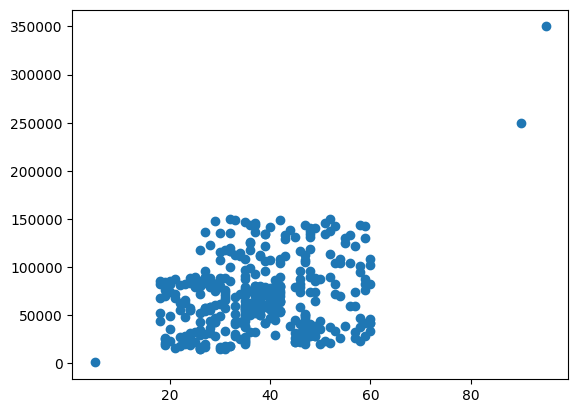

In [203]:
plt.scatter(df['Age'],df['EstimatedSalary'])

In [204]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop('Purchased', axis=1), df['Purchased'],test_size=0.3,random_state=0)

                Age  EstimatedSalary
count  2.820000e+02     2.820000e+02
mean   1.921237e-16     6.614095e-17
std    1.001778e+00     1.001778e+00
min   -3.025456e+00    -1.930537e+00
25%   -7.437417e-01    -7.405668e-01
50%   -1.048617e-01    -3.225098e-02
75%    7.165553e-01     4.989859e-01
max    4.732372e+00     5.124288e+00


Text(0.5, 1.0, 'After scaling')

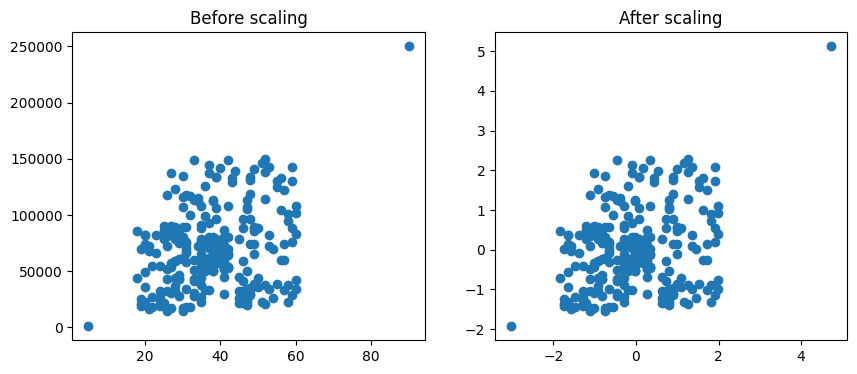

In [205]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)
print(X_train_scaled.describe())

fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(10,4))
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title('Before scaling')
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'])
ax2.set_title('After scaling')

- Due to the presence of outlier, the mean after scaling is nearly equal to 0 and SD is nearly equal to 1
- Impact of outlier is not reduced during standardization